# Convolutional PDEs

Initial [wave equation](https://en.wikipedia.org/wiki/Wave_equation#Introduction):

$$\frac{{\partial ^2 u}}{{\partial t^2 }} = {{c^2 \Delta u}}$$

discrete equations for $u$ with a discret time interval $\delta t$

$$
\begin{align} 
 u_0(x,y) &= C\\
 u_{n+1}(x,y) &= u_n(x,y) + u'_n(x,y) \delta t\\
 u'_{n+1}(x,y) &= u'_n(x,y) + u''_n(x,y) \delta t\\
\end{align}
$$

substituting $u''_n(x,y)$ with the RHS of the wave equation $c^2 \Delta u $

$$
\begin{align}
 u_0(x,y) &= C\\
 u_{n+1}(x,y) &= u_n(x,y) + u'_n(x,y) \delta t\\
 u'_{n+1}(x,y) &= u'_n(x,y) + (c^2 \Delta u ) \delta t\\
\end{align}
$$

Initial conditions:

In [3]:
%pylab inline
import time

Populating the interactive namespace from numpy and matplotlib


In [15]:
N = 51
u_init = np.zeros([N, N], dtype=np.float32)
ut_init = np.zeros([N, N], dtype=np.float32)

# initial condition
u_init[N//2,N//2] = 10
u_init[25,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      dtype=float32)

In [16]:
LaPlace = [[0., 1., 0.],[1., -4., 1.],[0., 1., 0.]]

In [17]:
t1 = time.time() # start timing for the loop
U_ = u_init
Ut_= ut_init
lU_= np.zeros_like(ut_init)
t1 = time.time() # start timing for the loop
for k in range(0,500):
    lU_[1:lU_.shape[0]-1,1:lU_.shape[0]-1] = 1/8 * ( -4*U_[1:lU_.shape[0]-1,1:lU_.shape[0]-1] 
                                                          + U_[1:lU_.shape[0]-1,0:lU_.shape[0]-2] 
                                                          + U_[1:lU_.shape[0]-1,2:lU_.shape[0]] 
                                                          + U_[0:lU_.shape[0]-2,1:lU_.shape[0]-1] 
                                                          + U_[2:lU_.shape[0],1:lU_.shape[0]-1] )
    U_  = U_+ Ut_
    Ut_ = Ut_ + (1./4.*lU_)
print('The vectorization without loop takes {0:0.5f}s.'.format(time.time()-t1))

The vectorization without loop takes 0.01800s.


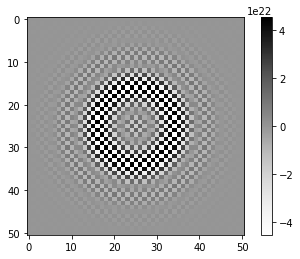

In [13]:

plt.imshow(U_,cmap='Greys')
#xlim(20,30)
#ylim(20,30)
colorbar()


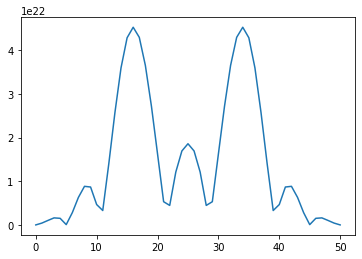

In [14]:
plt.plot(np.abs(U_[:,N//2]))